In [14]:
from positions import keyword_to_db_table

db_table = keyword_to_db_table()


keyword = '渠道销售 '

d = db_table[keyword] if db_table[keyword] else None

DB_NAME = d['DB_NAME']
TABLE_NAME= d['TABLE_NAME']
print(DB_NAME, TABLE_NAME)

# -*- conding: UTF-8 -*-
import pymysql
import pandas
import pyforest
import wordcloud

conn = pymysql.Connection(
   host='localhost',
   port=3306,
   user='root',
   password='123456',
   charset='utf8',
   db=DB_NAME,
)

def get_data(table_name, keywords):
    sql_select = f'select * from {table_name} where keywords="{keywords}"'
    df = pandas.read_sql(sql_select, conn)
    return df
    

data = get_data(table_name=TABLE_NAME, keywords=keyword)
data.head(5)

销售 销售


,id,position_id,keywords,detail_url,position,tags,salary,job_type,city,district,street,education,work_experience,release_date,description,company_name,company_scale,company_field,company_type,company_benefits
0,2505,5113455,渠道销售,https://www.lagou.com/jobs/5113455.html,渠道销售经理,云计算|销售|商务渠道,15k-21k,全职,上海,杨浦区,长阳路2555号,本科及以上,3-5年,2020-04-16,岗位职责：1.负责上海、深圳、成都区域云计算服务等相关产品渠道拓展工作，包括代理商、ISV的...,CloudChef,50-150人,"企业服务,数据服务",B轮,扁平化管理|团建旅游|带薪休假|五险一金
1,2508,6987568,渠道销售,https://www.lagou.com/jobs/6987568.html,渠道销售经理,医疗健康|企业服务|代理商销售|渠道分销|市场拓展|代理商,10k-18k,全职,广州,天河区,科华街251号乐天创意园B栋4011,大专及以上,1-3年,2020-04-16,岗位职责：1.负责区域渠道的挖掘和培养，完成业务目标；2.分析渠道情况，保持项目跟进；3.维...,易简医护,15-50人,"软件开发,电商",不需要融资,高梯度薪酬|13薪|大厂老大带管
2,2511,6261547,渠道销售,https://www.lagou.com/jobs/6261547.html,渠道销售经理,销售|商务渠道|大客户销售,8k-12k,全职,杭州,滨江区,江南大道3688号潮人汇9楼,大专及以上,3-5年,2020-04-16,1、负责公司互联网医院云平台产品的渠道拓展与推广工作；2、制定区域代理商发展规划和策略，开拓...,纳里健康,150-500人,医疗丨健康,B轮,股票期权|精英团队|高潜行业
3,2514,6988553,渠道销售,https://www.lagou.com/jobs/6988553.html,渠道销售经理,客户代表|销售|渠道分销|电话销售,8k-15k,全职,广州,海珠区,广州大道南 788 号广一电商园 22 号楼之一 1-4 层,大专及以上,不限,2020-04-16,一、岗位职责：1、负责省外市场合作伙伴的渠道拓展、扶持合作伙伴在当地进行市场推广及销售；2、...,小卫科技,150-500人,"移动互联网,医疗丨健康",C轮,发展空间大|福利待遇佳
4,2517,6684007,渠道销售,https://www.lagou.com/jobs/6684007.html,渠道销售经理,渠道|代理商|销售,4k-8k,全职,成都,高新区,科园三路4号火炬时代B区7层,大专及以上,1-3年,2020-04-16,我们公司是一个高速发展，连续十余年实现目标、盈利的公司，我们不是在招聘，我们在通过招聘寻找事...,西辰软件,50-150人,"移动互联网,消费生活",未融资,周末双休|福利好|晋升空间大


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

统计岗位数: 743


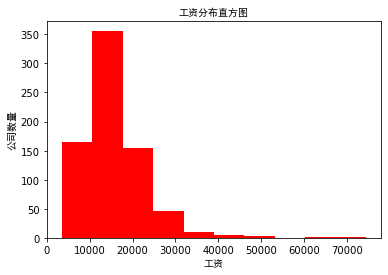

In [2]:
# 从表中可以看出，薪水一列是采用“最低-最高”的区间的方式进行表示的，这里我们将其转换成平均值，这里我们将工资中的‘k’、‘K’换成数字，便于计算。
min_ = data['salary'].str.split('-').str[0].str.rstrip('k').str.rstrip('K').astype('float64')*1000
max_ = data['salary'].str.split('-').str[1].str.rstrip('k').str.rstrip('K').astype('float64')*1000
salary = (min_ + max_) * 0.5
plt.hist(salary,10,facecolor = 'r')
plt.xlabel('工资',fontproperties = 'SimHei')
plt.ylabel('公司数量',fontproperties = 'SimHei')
plt.title('工资分布直方图',fontproperties = 'SimHei')
print('统计岗位数:', len(data))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

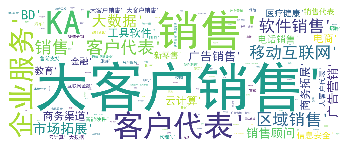

In [3]:
tags = data['tags']
text = []
for tag in tags:
    words = str(tag).split(sep='|')
    text.extend(words)
# string = str(text).replace('Python','').replace('数据挖掘','').replace('大数据','')
string = str(text)
font = r'C:\Windows\Fonts\SimHei.TTF'
wc = wordcloud.WordCloud(font_path=font, 
               background_color='white',
               width=1000,
               height=400,
               )
wc.generate(string)
wc.to_file('gongyi.png') #保存图片
# plt.figure(figsize=(1000,400))
plt.imshow(wc)  #用plt显示图片
plt.axis('off') #不显示坐标轴
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

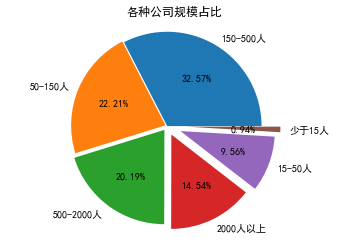

In [4]:
ex_list = [0, 0.02, 0.05, 0.10, 0.15, 0.20, 0.30, 0.40, 0.50, 0.70, 0.80, 1.00, 1.20, 1.50]
_ = data['company_scale'].value_counts()
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.pie(_, labels = list(_.index), explode = ex_list[:len(_)], autopct = '%1.2f%%',startangle = 0)
plt.title('各种公司规模占比')
plt.axis('equal')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

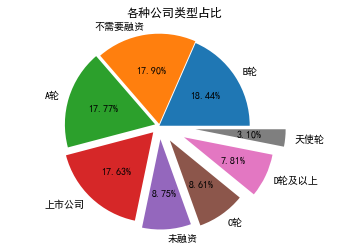

In [5]:
_ = data['company_type'].value_counts()
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.pie(_, labels = list(_.index), explode = ex_list[:len(_)], autopct = '%1.2f%%',startangle = 0)
plt.title('各种公司类型占比')
plt.axis('equal')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

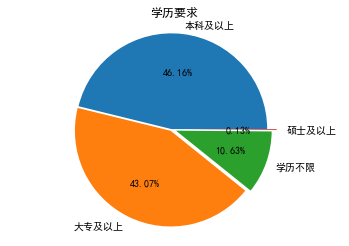

In [6]:
_ = data['education'].value_counts()
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.pie(_, labels = list(_.index), explode = ex_list[:len(_)], autopct = '%1.2f%%',startangle = 0)
plt.title('学历要求')
plt.axis('equal')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

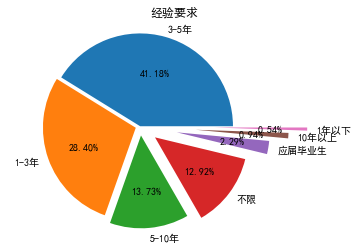

7


In [7]:
ex_list = [0, 0.05, 0.10, 0.20, 0.40, 0.60, 0.80, 1.00, 1.20, 1.50]
_ = data['work_experience'].value_counts()
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.pie(_, labels = list(_.index), explode = ex_list[:len(_)], autopct = '%1.2f%%',startangle = 0)
plt.title('经验要求')
plt.axis('equal')
plt.show()
print(len(_))

In [8]:
data['city'].value_counts()

北京      198
上海      170
深圳      110
广州       80
杭州       74
成都       30
武汉       15
南京        8
天津        8
重庆        7
南宁        4
西安        4
郑州        3
贵阳        3
长沙        3
福州        2
东莞        2
合肥        2
沈阳        2
厦门        2
苏州        2
济南        1
保山        1
宁波        1
金华        1
乌鲁木齐      1
珠海        1
嘉兴        1
安庆        1
拉萨        1
泰州        1
长春        1
哈尔滨       1
青岛        1
昆明        1
Name: city, dtype: int64

In [9]:
# from pyecharts import options as opts
# from pyecharts.charts import Geo
# from pyecharts.faker import Faker
# city = data['city'].value_counts().index.tolist()
# job_num = data['city'].value_counts().tolist()
# c = (
#     Geo()
#     .add_schema(maptype="china")
#     .add("岗位分布", [list(z) for z in zip(city, job_num)])
#     .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
#     .set_global_opts(
#         visualmap_opts=opts.VisualMapOpts(
#             is_piecewise=True,  # 设置是否为分段显示
#             # 自定义的每一段的范围，以及每一段的文字，以及每一段的特别的样式。例如：
#             pieces=[
#                 {"min": 200, "label": '>200人', "color": "#eb2f06"},
#                 {"min": 150, "max": 199, "label": '150-199人', "color": "#FF3030"},  # 不指定 max，表示 max 为无限大（Infinity）。
#                 {"min": 100, "max": 149, "label": '100-149人', "color": "#FF4500"},
#                 {"min": 50, "max": 99, "label": '50-99人', "color": "#FF7F50"},
#                 {"min": 10, "max": 49, "label": '10-49人', "color": "#FFA500"},
#                 {"min": 1, "max": 9, "label": '1-9人', "color": "#FFDEAD"},
#             ],
#             # 两端的文本，如['High', 'Low']。
#             range_text=['高', '低'],
#         ),
#         title_opts=opts.TitleOpts(title="市级Python岗位分布图"),
#     )
#     .render("市级Python岗位分布图.html")
# )

In [10]:
type(salary.value_counts())

pandas.core.series.Series

In [11]:
s = salary.value_counts().index
s

Float64Index([15000.0, 12500.0, 22500.0, 20000.0, 11500.0,  9000.0,  7500.0,
              30000.0, 17500.0, 10000.0, 13500.0, 12000.0, 10500.0,  6000.0,
              18000.0,  8000.0, 16000.0, 25000.0,  7000.0, 37500.0, 11000.0,
              19000.0,  8500.0, 14000.0, 15500.0, 47500.0, 40000.0, 21500.0,
              20500.0,  9500.0, 27500.0, 14500.0, 27000.0, 21000.0, 13000.0,
              26500.0,  6500.0, 74500.0,  4500.0, 65000.0, 24000.0,  3500.0,
              34000.0, 16500.0, 35000.0, 39000.0, 28000.0,  5500.0, 41500.0,
              23000.0, 19500.0, 17000.0],
             dtype='float64')

In [12]:

data[data['salary'] == '10k以上']

,id,position_id,keywords,detail_url,position,tags,salary,job_type,city,district,street,education,work_experience,release_date,description,company_name,company_scale,company_field,company_type,company_benefits
